<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [47]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [48]:
Wholesale_customers_data = pd.read_csv(r'C:\Users\tiago\OneDrive\Ambiente de Trabalho\NovaPasta\lab-unsupervised-learning-en\your-code\Wholesale customers data.csv')

In [49]:
Wholesale_customers_data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [50]:
print(Wholesale_customers_data['Channel'].unique())

[2 1]


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [51]:
print(Wholesale_customers_data.columns.tolist()) 

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [52]:
#missing data
print(Wholesale_customers_data.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [53]:
#Compute and print the correlation matrix 
correlation_matrix=Wholesale_customers_data.corr()
print(correlation_matrix)

                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

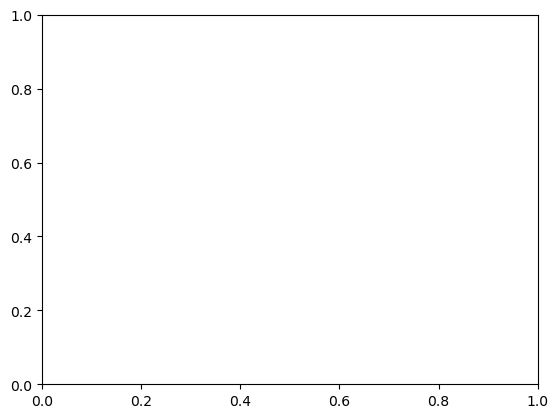

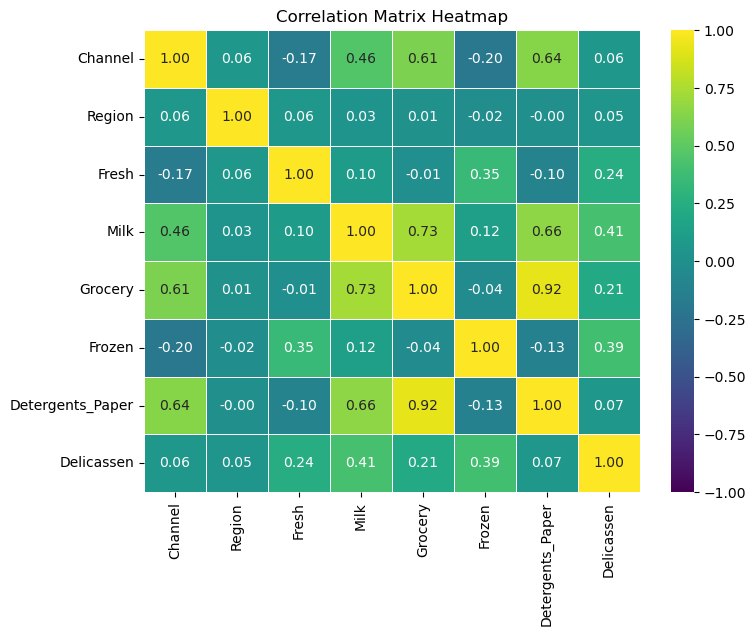

In [54]:
#Create a heatmap using `seaborn` to visualize which columns have high collinearity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
        #annot=True: Annotates each cell with the correlation value.
        #fmt='.2f': Specifies that the correlation values should be formatted to 2 decimal places.
        #linewidths=0.5: Adds a border between the cells for better visual clarity.
        #vmin=-1 and vmax=1: Sets the range for color intensity. -1 will be the darkest color for negative correlations, and 1 will be the darkest for positive correlations.

#Add a title to the heatmap
plt.title('Correlation Matrix Heatmap') 

# plot the heatmap 
plt.show()       

In [55]:
#Descriptive statistics
Wholesale_customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


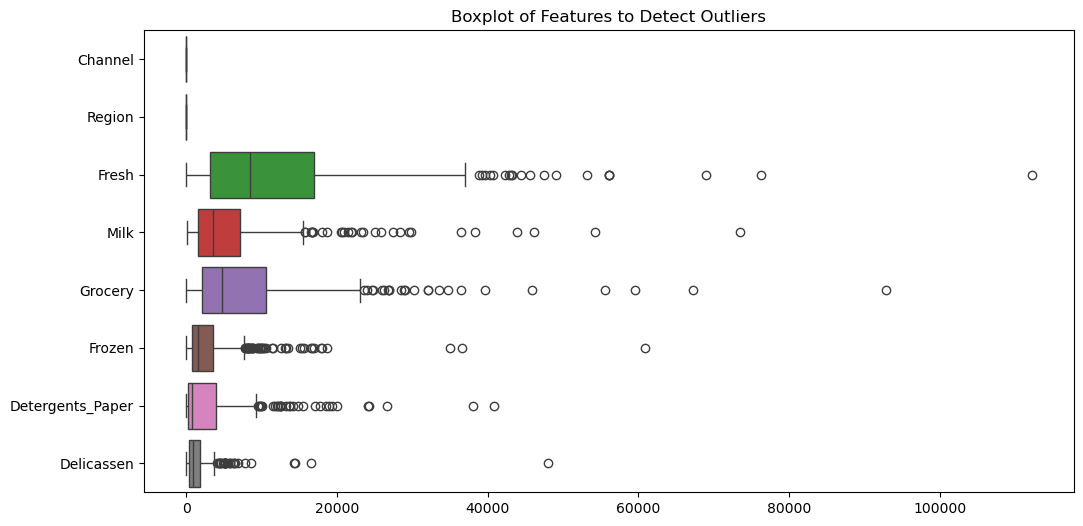

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [56]:
# Detecting outliers using the Interquartile Range (IQR) method

def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

# Boxplot visualization for outliers
def plot_boxplots(df):
    plt.figure(figsize=(12, 6))
    df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
    sns.boxplot(data=df_numeric, orient="h")
    plt.title("Boxplot of Features to Detect Outliers")
    plt.show()

# Run the functions to detect outliers and visualize them
outliers_iqr = detect_outliers_iqr(Wholesale_customers_data)
plot_boxplots(Wholesale_customers_data)

# Display outlier counts per column
outliers_iqr

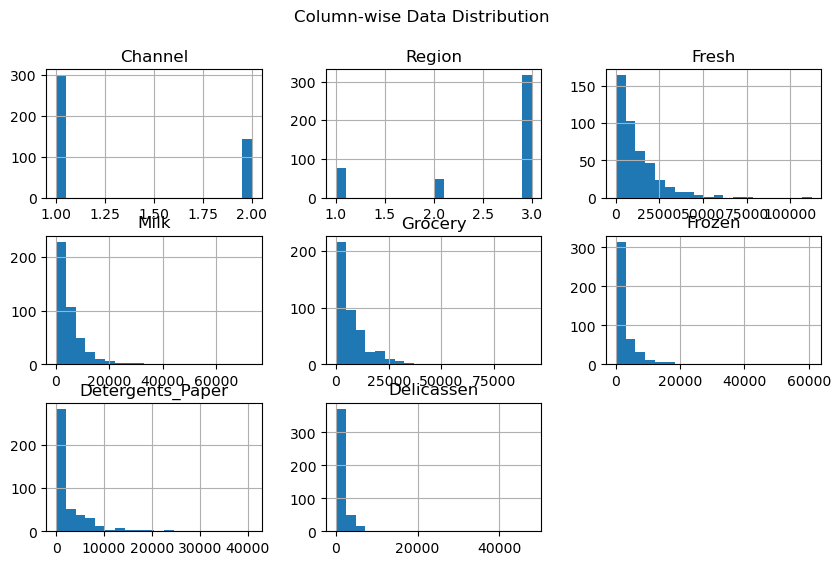

In [57]:
skew_value=Wholesale_customers_data.skew()
Wholesale_customers_data.hist(figsize=(10, 6), bins=20)
plt.suptitle("Column-wise Data Distribution")
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- not the same range in all columns 



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [58]:
print(f"Duplicate rows before removal: {Wholesale_customers_data.duplicated().sum()}")

Duplicate rows before removal: 0


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [59]:
from sklearn.preprocessing import StandardScaler
# Apply StandardScaler (Mean = 0, Std = 1)
scaler = StandardScaler()
customers_scale= scaler.fit_transform(Wholesale_customers_data)
customers_scale=pd.DataFrame(customers_scale)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [60]:
from sklearn.cluster import KMeans

### Looking to the elbow we can choose 2 like the correct number of clusters

In [61]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\tiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [62]:
customers_scale['labels'] = clusters

Count the values in `labels`.

In [63]:
print(customers_scale['labels'].value_counts())

labels
1    306
0    134
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [64]:
from sklearn.cluster import DBSCAN 
customers_scale.columns = customers_scale.columns.astype(str)
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan.fit(customers_scale)

DBSCAN()

Count the values in `labels_DBSCAN`.

In [65]:
customers_scale['DBSCAN_labels'] = dbscan.labels_
print(customers_scale['DBSCAN_labels'].value_counts())

DBSCAN_labels
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


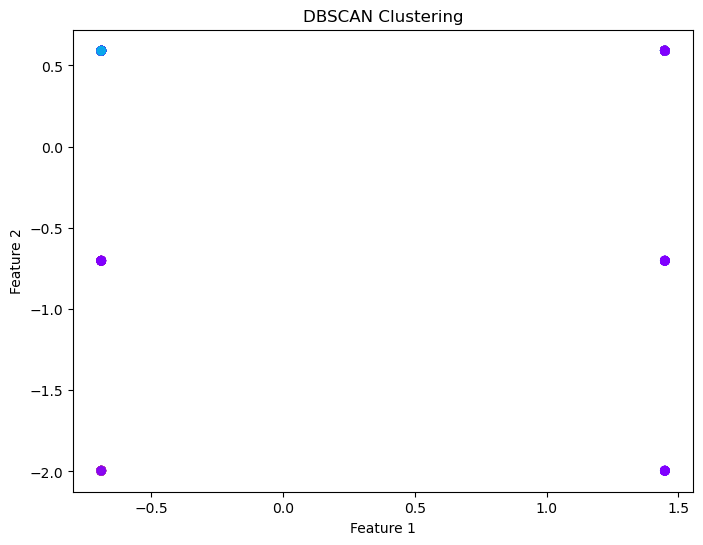

In [66]:
# Convert to NumPy array for plotting
X = customers_scale.to_numpy()

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="rainbow", alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [67]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

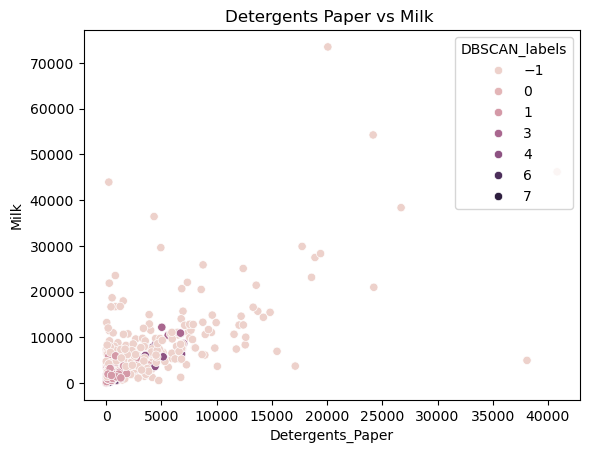

In [68]:
# Create a DataFrame with both cluster results

comparison_df = Wholesale_customers_data.copy()
comparison_df['KMeans_labels'] = kmeans_2.labels_
comparison_df['DBSCAN_labels'] = dbscan.labels_
plot(Wholesale_customers_data['Detergents_Paper'], Wholesale_customers_data['Milk'], hue=comparison_df['DBSCAN_labels'] )

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

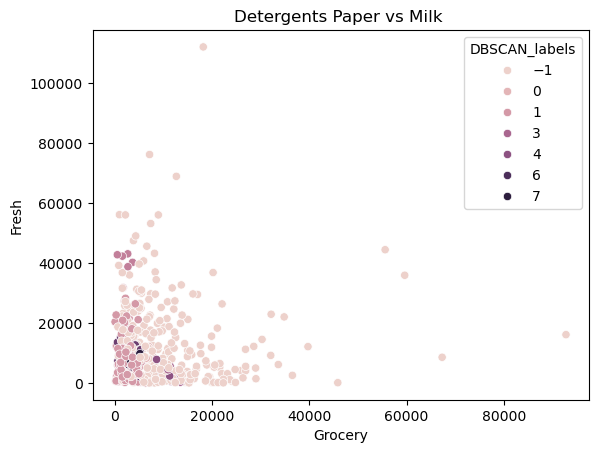

In [69]:
# Create a DataFrame with both cluster results

comparison_df = Wholesale_customers_data.copy()
comparison_df['KMeans_labels'] = kmeans_2.labels_
comparison_df['DBSCAN_labels'] = dbscan.labels_
plot(Wholesale_customers_data['Grocery'], Wholesale_customers_data['Fresh'], hue=comparison_df['DBSCAN_labels'] )



Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

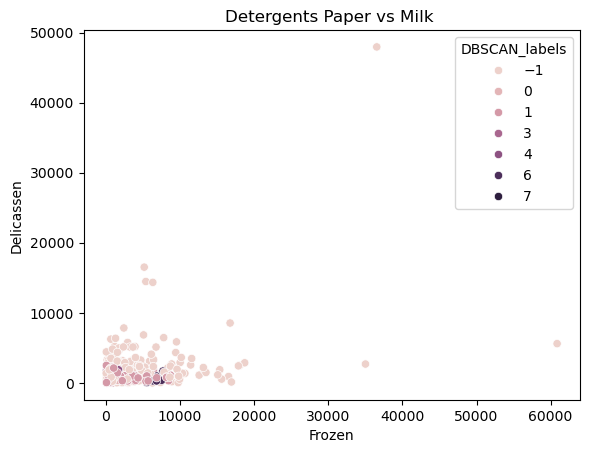

In [70]:
# Create a DataFrame with both cluster results

comparison_df = Wholesale_customers_data.copy()
comparison_df['KMeans_labels'] = kmeans_2.labels_
comparison_df['DBSCAN_labels'] = dbscan.labels_
plot(Wholesale_customers_data['Frozen'], Wholesale_customers_data['Delicassen'], hue=comparison_df['DBSCAN_labels'] )

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# 🔹 Group by KMeans labels and compute mean for all columns
grouped_kmeans = Wholesale_customers_data.groupby("KMeans_Labels").mean(numeric_only=True)

print(grouped_kmeans)



                Channel    Region         Fresh          Milk       Grocery  \
KMeans_Labels                                                                 
0              1.091324  2.502283   8929.118721   2516.310502   3299.319635   
1              1.816327  2.622449   5824.173469   8836.234694  12727.244898   
2              1.000000  3.000000  36847.000000  43950.000000  20170.000000   
3              1.133333  2.666667  38770.466667   4822.155556   6211.777778   
4              2.000000  2.357143   6367.607143  17198.678571  26514.250000   
5              1.000000  2.000000  32717.000000  16784.000000  13626.000000   
6              2.000000  2.800000  25603.000000  43460.600000  61472.200000   
7              1.069767  2.534884  14728.883721   3645.046512   3852.441860   

                     Frozen  Detergents_Paper    Delicassen  
KMeans_Labels                                                
0               1759.675799        801.808219    917.799087  
1               1566.74

Which algorithm appears to perform better?

<Figure size 800x500 with 0 Axes>

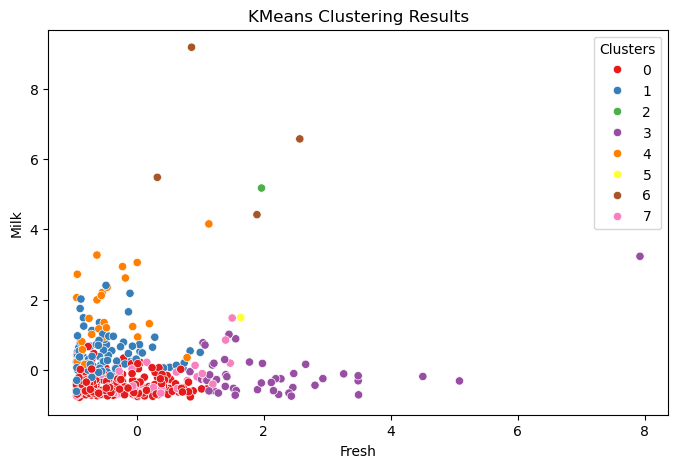

In [89]:
# Plot KMeans Clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=Wholesale_customers_data['KMeans_Labels'], palette='Set1')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.title("KMeans Clustering Results")
plt.legend(title="Clusters")
plt.show()

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:

# Select numerical features for clustering (excluding 'Channel' and 'Region')
features = Wholesale_customers_data.drop(columns=['Channel', 'Region'])

# Standardize the features (Scaling is important for distance-based clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
Wholesale_customers_data['KMeans_Labels'] = kmeans.fit_predict(features_scaled)
grouped_kmeans = Wholesale_customers_data.groupby("KMeans_Labels").mean(numeric_only=True)
print("Mean by KMeans Labels:\n", grouped_kmeans)

Mean by KMeans Labels:
                 Channel    Region         Fresh          Milk       Grocery  \
KMeans_Labels                                                                 
0              1.091324  2.502283   8929.118721   2516.310502   3299.319635   
1              1.816327  2.622449   5824.173469   8836.234694  12727.244898   
2              1.000000  3.000000  36847.000000  43950.000000  20170.000000   
3              1.133333  2.666667  38770.466667   4822.155556   6211.777778   
4              2.000000  2.357143   6367.607143  17198.678571  26514.250000   
5              1.000000  2.000000  32717.000000  16784.000000  13626.000000   
6              2.000000  2.800000  25603.000000  43460.600000  61472.200000   
7              1.069767  2.534884  14728.883721   3645.046512   3852.441860   

                     Frozen  Detergents_Paper    Delicassen  
KMeans_Labels                                                
0               1759.675799        801.808219    917.799087  

c:\Users\tiago\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

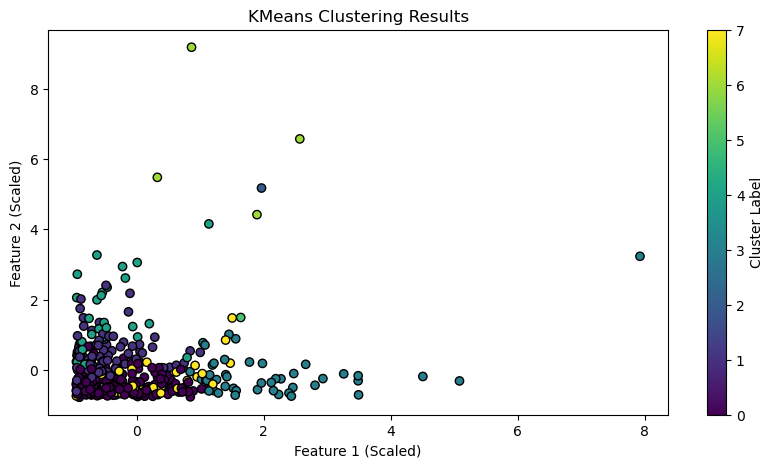

In [81]:
# Scatter plot for KMeans Clusters
plt.figure(figsize=(10, 5))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=Wholesale_customers_data["KMeans_Labels"], cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.title("KMeans Clustering Results")
plt.colorbar(label="Cluster Label")
plt.show()


**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)  # Adjust eps and min_samples as needed
dbscan.fit(customers_scale)
customers_scale['DBSCAN_labels'] = dbscan.labels_
print(customers_scale['DBSCAN_labels'].value_counts())

DBSCAN_labels
-1    255
 1    130
 0     33
 2     22
Name: count, dtype: int64


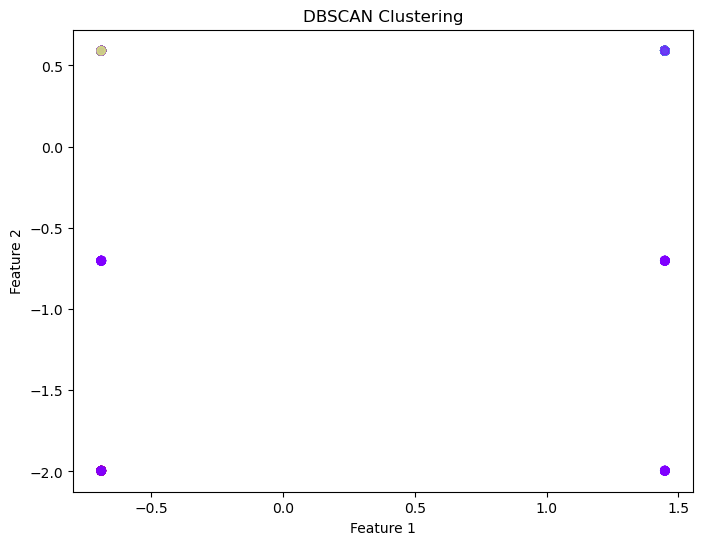

In [ ]:
# Convert to NumPy array for plotting
X = customers_scale.to_numpy()

# Plot DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="rainbow", alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**Your comment here**

- 